In [24]:
# %matplotlib widget
import pandas as pd
import numpy as np
import pw_helpers
import matplotlib.pyplot as plt

# Introduction to pandas

The observations have been made by a GNSS receiver placed on the roof of a building at CNES (Toulouse), and recorded in `RINEX` format (Receiver Independent Exchange format). The RINEX file has been post-processed by `PRX` (processed RINEX), a program developped by GNSS enthusiasts, to compute all the parameters required to compute a GNSS position. This produced a file, saved in `CSV` format (comma-separated values).

We are going to import this file in a data structure used by the `Pandas` package: the `pandas.DataFrame`.

In [25]:
# load data
data_prx = pw_helpers.prx_csv_to_pandas(
    # "./data/TLSE00FRA_R_20230010100_10S_01S_MO.csv",
    "./data/TLSE00FRA_R_20220010000_01D_30S_MO.csv"
)

# show the first 5 lines
data_prx.head()

,time_of_reception_in_receiver_time,constellation,prn,observation_code,code_observation_m,doppler_observation_hz,carrier_observation_m,lli,cn0_dbhz,satellite_position_m,satellite_velocity_mps,satellite_clock_bias_m,satellite_clock_bias_drift_mps,sagnac_effect_m,relativistic_clock_effect_m,group_delay_m,iono_delay_m,tropo_delay_m,approximate_antenna_position_m
0,2022-01-01,C,5,2I,3.985765e+07,1.488,3.985766e+07,NaN,35.0,"[21846144.43093318, 36038233.01399997, -206072...","[-0.49971522, -3.38037388, -71.41433383]",105186.054496,0.003417,-39.931532,-0.096240,-0.149896,4.033680,10.517274,"[4627853.3468, 119640.2373, 4372995.2492]"
1,2022-01-01,C,5,6I,3.985764e+07,NaN,3.985764e+07,NaN,37.3,"[21846144.43093318, 36038233.01399997, -206072...","[-0.49971522, -3.38037388, -71.41433383]",105186.054496,0.003417,-39.931532,-0.096240,0.000000,6.108958,10.517274,"[4627853.3468, 119640.2373, 4372995.2492]"
2,2022-01-01,C,5,7I,3.985765e+07,NaN,3.985765e+07,NaN,38.4,"[21846144.43093318, 36038233.01399997, -206072...","[-0.49971522, -3.38037388, -71.41433383]",105186.054496,0.003417,-39.931532,-0.096240,-2.758091,6.746002,10.517274,"[4627853.3468, 119640.2373, 4372995.2492]"
3,2022-01-01,C,6,2I,4.106246e+07,1780.016,4.106246e+07,NaN,32.2,"[-3324945.27938837, 38810691.92353565, 1636587...","[965.69670222, -842.48615164, 2181.77928673]",217962.228371,0.018606,-43.784923,1.345092,2.458298,4.670595,25.738153,"[4627853.3468, 119640.2373, 4372995.2492]"
4,2022-01-01,C,6,6I,4.106245e+07,NaN,4.106245e+07,NaN,34.1,"[-3324945.27938837, 38810691.92353565, 1636587...","[965.69670222, -842.48615164, 2181.77928673]",217962.228371,0.018606,-43.784923,1.345092,0.000000,7.073558,25.738153,"[4627853.3468, 119640.2373, 4372995.2492]"


The resulting `pd.DataFrame` contains a data table.  
The `pd.DataFrame` has an index (the first column) which is here just an integer.  
Each rows contains a single GNSS observation and all the associated data. You can see the list of all the available parameters as column headers.

In [26]:
data_prx.columns

Index(['time_of_reception_in_receiver_time', 'constellation', 'prn',
       'observation_code', 'code_observation_m', 'doppler_observation_hz',
       'carrier_observation_m', 'lli', 'cn0_dbhz', 'satellite_position_m',
       'satellite_velocity_mps', 'satellite_clock_bias_m',
       'satellite_clock_bias_drift_mps', 'sagnac_effect_m',
       'relativistic_clock_effect_m', 'group_delay_m', 'iono_delay_m',
       'tropo_delay_m', 'approximate_antenna_position_m'],
      dtype='object')


We are now going to learn how to use `pandas` feature in order to
- access the data,
- filter,
- plot

# Accessing data
To access a row, you can use the `.iloc[index_val]` method.  
> ***Instruction:*** *Try to access:*
> - *the first line of `data_prx`*
> - *the first two lines of `data_prx`*

Note: remember that Python uses a zero indexing convention.

In [27]:
# Complete this code
# first_line =
first_line = data_prx.iloc[0]

print(
    "Sucess!!\n\n", first_line
) if first_line.constellation == "C" and first_line.prn == 5 else print("Try again...")

Sucess!!

 time_of_reception_in_receiver_time                                  2022-01-01 00:00:00
constellation                                                                         C
prn                                                                                   5
observation_code                                                                     2I
code_observation_m                                                         39857654.125
doppler_observation_hz                                                            1.488
carrier_observation_m                                                   39857661.311907
lli                                                                                 NaN
cn0_dbhz                                                                           35.0
satellite_position_m                  [21846144.43093318, 36038233.01399997, -206072...
satellite_velocity_mps                         [-0.49971522, -3.38037388, -71.41433383]
satellite_clock_bias_

To access a particular column, you can call it either
- with brackets: `data_prx["code_observation_m"]`
- or with a dot: `data_prx.code_observation_m`

This will return another `pandas` structure, called the `pandas.Series`, sharing the same index.
A `pandas.Series` is just a `DataFrame` with a single column.

> ***Instruction:*** *Using `.head()`, display the 5 first values of the `prn` column of `data_prx`.*

In [28]:
# Complete this code
prn_series = data_prx.prn
prn_series = data_prx["prn"]

prn_series.head()

0    5
1    5
2    5
3    6
4    6
Name: prn, dtype: int64

You can also access several columns by putting a `list` of column names between brackets.
This will return another `DataFrame` with several columns.

> ***Instruction:*** *Using `.head()`, display the 5 first values of the `prn` and `constellation` columns of data_prx*

In [29]:
data_prx[["prn", "constellation"]].head()

,prn,constellation
0,5,C
1,5,C
2,5,C
3,6,C
4,6,C


# Conditional filtering
`pandas` allow to quickly filter the rows thanks to the `.loc[condition]` method, where `condition` is a `Series` of boolean.

For example, you can keep only the observations with high C/No thanks to the following line:  
`data_high_snr = data_prx.loc[ data_prx.cn0_dbhz > 40 ]`

> ***Instruction:*** *Try this command and display the number of observations before and after filtering.*

In [30]:
data_high_snr = data_prx.loc[data_prx.cn0_dbhz > 45]

print(f"There are {len(data_prx)} observations in the original dataset")
print(f"There are {len(data_high_snr)} observations with a C/No above 45 dbHz")

There are 343402 observations in the original dataset
There are 153238 observations with a C/No above 45 dbHz


You can also check if one column is within a list of values with the function `Series.isin(list)`.

> ***Instruction:*** *Display the number of observations from the constellations GPS (`constellation=="G"`) and Galileo (`constellation=="E"`)

In [31]:
data_gps = data_prx.loc[data_prx.constellation == "G"]
data_gal = data_prx.loc[data_prx.constellation == "E"]
data_gps_gal = data_prx.loc[data_prx.constellation.isin(["G", "E"])]

print(
    f"There are {len(data_gps)} GPS observations and {len(data_gal)} GAL observations."
)
print(f"This sums up to {len(data_gps_gal)} GPS and GAL observations.")

There are 102286 GPS observations and 87062 GAL observations.
This sums up to 189348 GPS and GAL observations.


You can use several conditions when filtering with `.loc[(condition_1) & (condition_2)]`

> ***Instruction:*** *Extract the observations containing only GPS and L1 C/Q observations (corresponding `observation_code` is `"1C"`)*

In [32]:
data_gps_c1c = data_prx.loc[
    (data_prx["constellation"] == "G") & (data_prx["observation_code"] == "1C")
]

print(f"There are {len(data_prx)} observations in the original dataset")
print(f"There are {len(data_gps_c1c)} GPS L1 C/A observations")

There are 343402 observations in the original dataset
There are 30998 GPS L1 C/A observations


If you look at the index of the resulting `DataFrame`, it is now a discontinuous integer series. It may be difficult to manipulate.  
You can use the method `.reset_index(drop=True)` to re-initialize the index.

> ***Instruction:*** *Display the first 3 rows (with `.head(3)`) before and after re-initializing the index.*

In [33]:
# Display the first 3 rows before re-initializing the index
data_gps_c1c.head(3)

,time_of_reception_in_receiver_time,constellation,prn,observation_code,code_observation_m,doppler_observation_hz,carrier_observation_m,lli,cn0_dbhz,satellite_position_m,satellite_velocity_mps,satellite_clock_bias_m,satellite_clock_bias_drift_mps,sagnac_effect_m,relativistic_clock_effect_m,group_delay_m,iono_delay_m,tropo_delay_m,approximate_antenna_position_m
53,2022-01-01,G,1,1C,2.359014e+07,3130.391,2.359014e+07,NaN,38.6,"[13882278.36185354, -21710064.590892, 5356877....","[-95.27713183, 749.44286298, 3156.71754927]",140640.701942,-0.002999,24.842432,4.556272,1.535619,3.543627,7.812548,"[4627853.3468, 119640.2373, 4372995.2492]"
57,2022-01-01,G,7,1C,2.499829e+07,-1562.125,2.499830e+07,NaN,34.9,"[3450545.23885582, -24371428.34086026, 9681088...","[775.94628613, -959.17859614, -2848.57256223]",89083.314019,0.001193,27.534683,10.162310,-3.350442,4.536107,22.313252,"[4627853.3468, 119640.2373, 4372995.2492]"
58,2022-01-01,G,8,1C,2.055479e+07,1097.641,2.055479e+07,NaN,50.9,"[15042244.91940234, -4694117.07689891, 2140963...","[1609.9670382, 2187.54994095, -617.8892848]",-15082.858459,-0.000443,5.721789,-4.804122,1.535619,1.592358,2.486462,"[4627853.3468, 119640.2373, 4372995.2492]"


In [34]:
# Re-initialize the index
data_gps_c1c = data_gps_c1c.reset_index(drop=True)

# Display the first 3 rows before re-initializing the index
data_gps_c1c.head(3)

,time_of_reception_in_receiver_time,constellation,prn,observation_code,code_observation_m,doppler_observation_hz,carrier_observation_m,lli,cn0_dbhz,satellite_position_m,satellite_velocity_mps,satellite_clock_bias_m,satellite_clock_bias_drift_mps,sagnac_effect_m,relativistic_clock_effect_m,group_delay_m,iono_delay_m,tropo_delay_m,approximate_antenna_position_m
0,2022-01-01,G,1,1C,2.359014e+07,3130.391,2.359014e+07,NaN,38.6,"[13882278.36185354, -21710064.590892, 5356877....","[-95.27713183, 749.44286298, 3156.71754927]",140640.701942,-0.002999,24.842432,4.556272,1.535619,3.543627,7.812548,"[4627853.3468, 119640.2373, 4372995.2492]"
1,2022-01-01,G,7,1C,2.499829e+07,-1562.125,2.499830e+07,NaN,34.9,"[3450545.23885582, -24371428.34086026, 9681088...","[775.94628613, -959.17859614, -2848.57256223]",89083.314019,0.001193,27.534683,10.162310,-3.350442,4.536107,22.313252,"[4627853.3468, 119640.2373, 4372995.2492]"
2,2022-01-01,G,8,1C,2.055479e+07,1097.641,2.055479e+07,NaN,50.9,"[15042244.91940234, -4694117.07689891, 2140963...","[1609.9670382, 2187.54994095, -617.8892848]",-15082.858459,-0.000443,5.721789,-4.804122,1.535619,1.592358,2.486462,"[4627853.3468, 119640.2373, 4372995.2492]"


# Operation on `DataFrame`
You can apply some usual operations on whole `Series`, such as `mean(), sum(), min(), max(), median(), idxmax(), idxmin(), quantile([q1,q2,…])`


Compute the minimum and maximum values of the code and doppler observation on `data_gps_c1c`.

In [35]:
code_min = data_gps_c1c.code_observation_m.min()
code_max = data_gps_c1c.code_observation_m.max()
dop_min = data_gps_c1c.doppler_observation_hz.min()
dop_max = data_gps_c1c.doppler_observation_hz.max()

print(
    f"The GPS L1 C/A code pseudorange observations are within {code_min} and {code_max} meters."
)
print(
    f"The GPS L1 C/A doppler offset observations are within {dop_min} and {dop_max} meters."
)

The GPS L1 C/A code pseudorange observations are within 20018918.891 and 26506614.891 meters.
The GPS L1 C/A doppler offset observations are within -3828.492 and 4011.723 meters.


# Plot
`pandas` has integrated plotting capabilities. You can easily plot a `Series` by using the `.plot()` method.

> ***Instruction:*** *Plot the code observations.*

<Axes: >

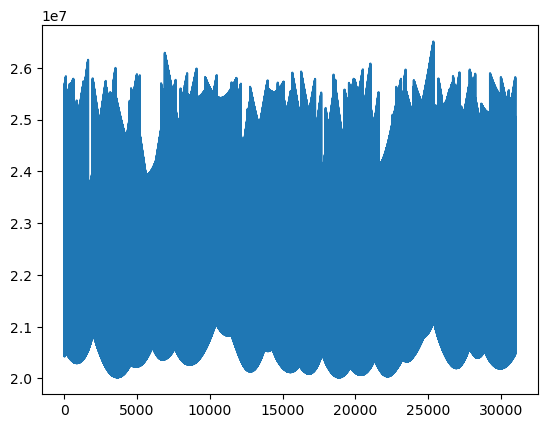

In [36]:
data_gps_c1c.code_observation_m.plot()

We can specify the columns to be used as x- or y- axis: `pd.DataFrame.plot(x="axis_1", y="axis_2")`

> ***Instruction:*** *Plot the code observation vs time.*

<Axes: xlabel='time_of_reception_in_receiver_time'>

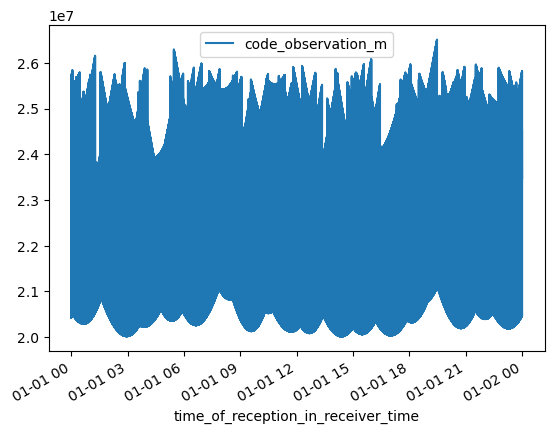

In [37]:
data_gps_c1c.plot(x="time_of_reception_in_receiver_time", y="code_observation_m")

We see that since the data from several satellites are all mixed up, we do not distinguish a clear pattern.  
To plot add several lines to the same plot, we not to specify that the plots are drawn on the same `matplotlib.pyplot.axes`. This can be specified using the `ax=` keyword when calling `DataFrame.plot()`

> ***Instruction:*** *Plot the GPS L1 C/A code observations vs time, with a different color for prn 1, 3 and 8.*

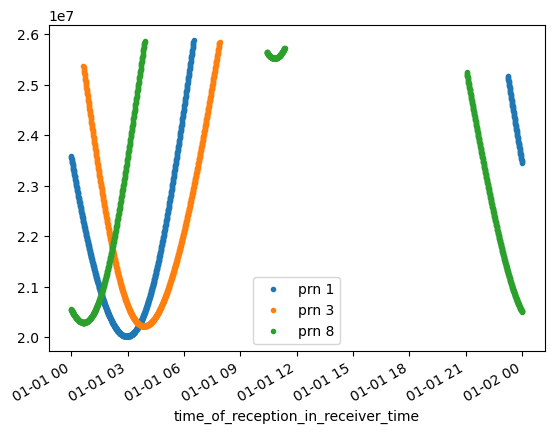

In [38]:
fix, ax = plt.subplots()

# data_gps_c1c.loc[data_gps_c1c.prn == 1].plot(x="time_of_reception_in_receiver_time", y="code_observation_m", ax=ax, label="prn 1")
# data_gps_c1c.loc[data_gps_c1c.prn == 3].plot(x="time_of_reception_in_receiver_time", y="code_observation_m", ax=ax, label="prn 3")
# data_gps_c1c.loc[data_gps_c1c.prn == 8].plot(x="time_of_reception_in_receiver_time", y="code_observation_m", ax=ax, label="prn 8")

for prn in [1, 3, 8]:
    data_gps_c1c.loc[data_gps_c1c.prn == prn].plot(
        x="time_of_reception_in_receiver_time",
        y="code_observation_m",
        ax=ax,
        label="prn " + str(prn),
        marker=".",
        linestyle="None",
    )

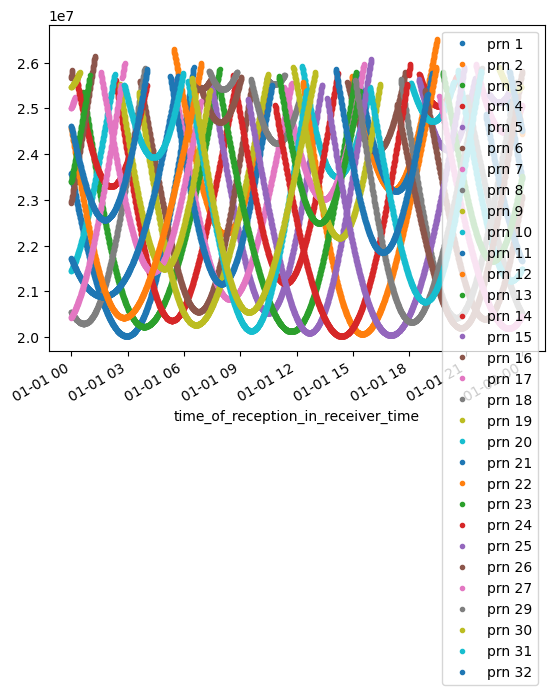

In [39]:
# plotting using groupby
fix, ax = plt.subplots()
for key, group in data_gps_c1c.groupby("prn"):
    group.plot(
        x="time_of_reception_in_receiver_time",
        y="code_observation_m",
        ax=ax,
        label="prn " + str(key),
        marker=".",
        ls="",
    );
    # print(f"Plotting data for prn {key}")

# Applying functions to whole `DataFrame`

When dealing with tabular data, it can be quite usual to apply a function to each row of the table. This can be done using the `.apply()` ([doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)) method of a `DataFrame`.

Let use it to compute the orbital radius of the satellite for each row of the `DataFrame`.
- The orbital radius can be obtained by taking the norm of the satellite ECEF position. The norm of an array is computed using the function `numpy.linalg.norm(array)`
- The `norm` function has to be applied only to the column `data_gps_c1c.satellite_position_m`
- The apply method has to be applied to each row, so we have to define the keyword argument `axis=0` in the call to the `apply()` function.

So in the end, we'll have to use: `data_gps_c1c.satellite_position_m.apply(np.linalg.norm, axis=0)`

> ***Instruction:***
> - *Compute the orbital radius of each GPS satellite*
> - *add it as an additional column named `orbital_radius_m` to `data_gps_c1c`*
> - *plot the orbital radius vs time for each GPS satellite*

In [40]:
# Use .apply() to compute the norm of the satellite position for each row
data_gps_c1c.satellite_position_m.apply(np.linalg.norm, axis=0)

0        2.631997e+07
1        2.644988e+07
2        2.658338e+07
3        2.673115e+07
4        2.682364e+07
             ...     
30993    2.640176e+07
30994    2.654326e+07
30995    2.672805e+07
30996    2.657939e+07
30997    2.666007e+07
Name: satellite_position_m, Length: 30998, dtype: float64

In [41]:
# add this data as an additional column to data_gps_c1c
data_gps_c1c["orbital_radius_m"] = data_gps_c1c.satellite_position_m.apply(np.linalg.norm, axis=0)

# show the first 3 lines
data_gps_c1c.head(3)

,time_of_reception_in_receiver_time,constellation,prn,observation_code,code_observation_m,doppler_observation_hz,carrier_observation_m,lli,cn0_dbhz,satellite_position_m,satellite_velocity_mps,satellite_clock_bias_m,satellite_clock_bias_drift_mps,sagnac_effect_m,relativistic_clock_effect_m,group_delay_m,iono_delay_m,tropo_delay_m,approximate_antenna_position_m,orbital_radius_m
0,2022-01-01,G,1,1C,2.359014e+07,3130.391,2.359014e+07,NaN,38.6,"[13882278.36185354, -21710064.590892, 5356877....","[-95.27713183, 749.44286298, 3156.71754927]",140640.701942,-0.002999,24.842432,4.556272,1.535619,3.543627,7.812548,"[4627853.3468, 119640.2373, 4372995.2492]",2.631997e+07
1,2022-01-01,G,7,1C,2.499829e+07,-1562.125,2.499830e+07,NaN,34.9,"[3450545.23885582, -24371428.34086026, 9681088...","[775.94628613, -959.17859614, -2848.57256223]",89083.314019,0.001193,27.534683,10.162310,-3.350442,4.536107,22.313252,"[4627853.3468, 119640.2373, 4372995.2492]",2.644988e+07
2,2022-01-01,G,8,1C,2.055479e+07,1097.641,2.055479e+07,NaN,50.9,"[15042244.91940234, -4694117.07689891, 2140963...","[1609.9670382, 2187.54994095, -617.8892848]",-15082.858459,-0.000443,5.721789,-4.804122,1.535619,1.592358,2.486462,"[4627853.3468, 119640.2373, 4372995.2492]",2.658338e+07


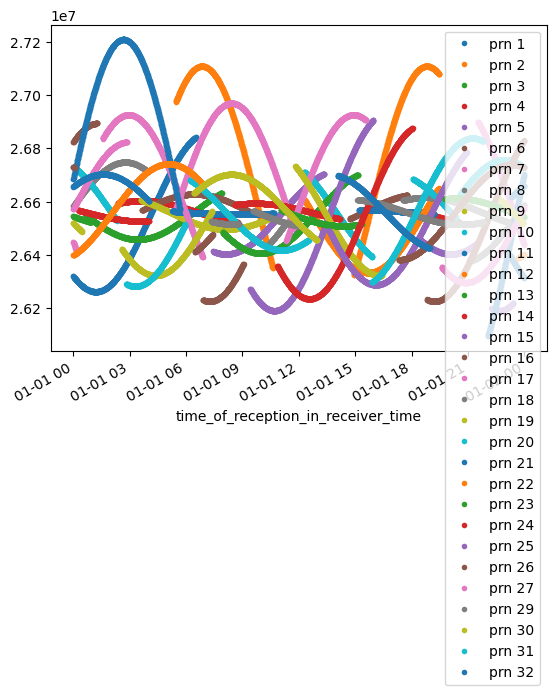

In [42]:
# plotting using groupby
fix, ax = plt.subplots()
for key, group in data_gps_c1c.groupby("prn"):
    group.plot(
        x="time_of_reception_in_receiver_time",
        y="orbital_radius_m",
        ax=ax,
        label="prn " + str(key),
        marker=".",
        ls="",
    )

Compute the mean orbital radius over time for all constellations (using `.groupby()`)
Plot it
Can you explain the differences ?

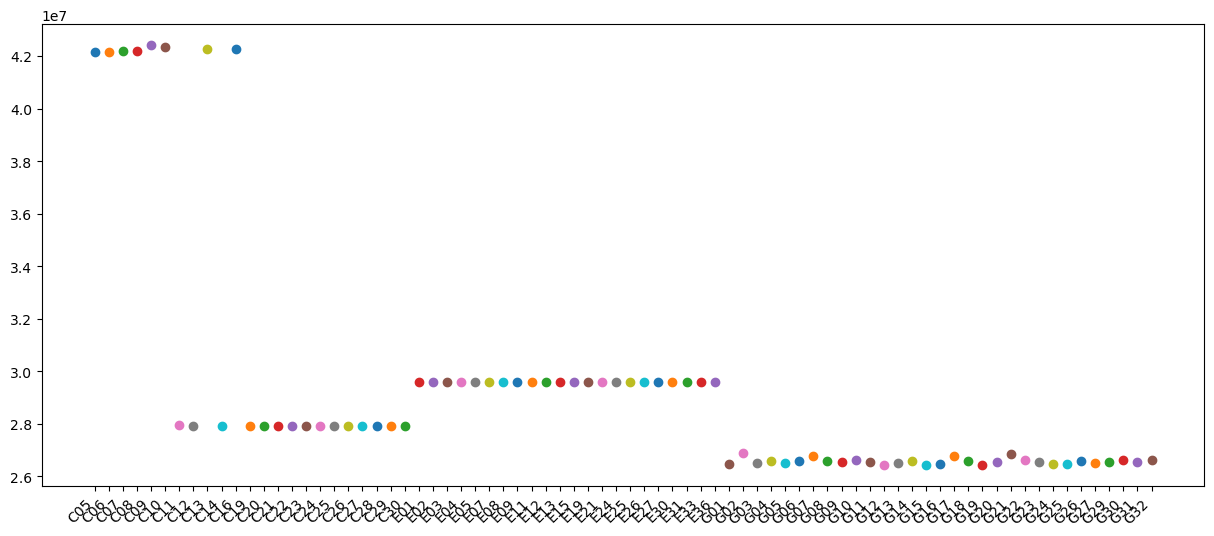

In [43]:
data_prx["orbital_radius_m"] = data_prx.satellite_position_m.apply(np.linalg.norm, axis=0)
data_prx.head()

fix, ax = plt.subplots(figsize=(15,6))
index=0
label=[]
for key, group in data_prx.groupby(["constellation","prn"]):
    if key[0] in ["G","C","E"]: # plot only GPS, Galileo and Beidou
        ax.plot(
            index,
            group.orbital_radius_m.mean(),
            marker="o",
        );
        index+=1
        label.append(key[0]+str(key[1]).zfill(2))
    # print(str(index)+"  "+key[0]+str(key[1]).zfill(2)+f"    {group.orbital_radius_m.mean()}")

ax.set_xticks(ticks=range(len(label)),labels=label, rotation=45, ha="right");

# Creating sub-groups in a `DataFrame`

The method `.groupby(condition)` creates a `pandas.api.typing.DataFrameGroupBy` object, which is basically the initial dataset split in different groups based on the `condition` criteria. You can then perform operations on the different groups.

The resulting object contains a dictionary where:
- the keys are the different labels used to categorize the initial dataframe,
- the values are the index corresponding to each label.

In [44]:
data_gps_c1c.groupby("prn").get_group(1)
data_gps_c1c.groupby("prn").groups
# data_gps_c1c.groupby("prn").groups.keys()
# data_gps_c1c.groupby("prn").groups.values()


{1: [0, 12, 24, 36, 48, 60, 72, 83, 94, 105, 115, 126, 137, 148, 159, 170, 181, 192, 203, 214, 225, 236, 247, 258, 269, 280, 291, 301, 311, 321, 331, 341, 351, 361, 372, 383, 394, 405, 416, 427, 438, 449, 460, 471, 482, 493, 504, 515, 526, 537, 548, 559, 570, 581, 592, 603, 614, 624, 634, 644, 654, 664, 674, 684, 694, 704, 714, 724, 734, 744, 754, 764, 774, 784, 794, 804, 814, 824, 834, 844, 855, 866, 877, 888, 899, 910, 921, 932, 943, 954, 965, 976, 987, 998, 1009, 1020, 1031, 1042, 1053, 1064, ...], 2: [6902, 6915, 6928, 6941, 6954, 6967, 6980, 6993, 7006, 7019, 7032, 7045, 7058, 7071, 7084, 7097, 7110, 7123, 7136, 7149, 7162, 7175, 7188, 7201, 7214, 7227, 7240, 7253, 7265, 7277, 7289, 7301, 7313, 7325, 7337, 7349, 7361, 7373, 7385, 7397, 7409, 7421, 7433, 7445, 7457, 7469, 7481, 7493, 7505, 7517, 7529, 7541, 7553, 7565, 7577, 7589, 7601, 7613, 7625, 7637, 7649, 7660, 7671, 7682, 7693, 7704, 7715, 7726, 7737, 7748, 7759, 7770, 7781, 7792, 7803, 7814, 7825, 7836, 7847, 7858, 7869, 788

<Axes: xlabel='time_of_reception_in_receiver_time'>

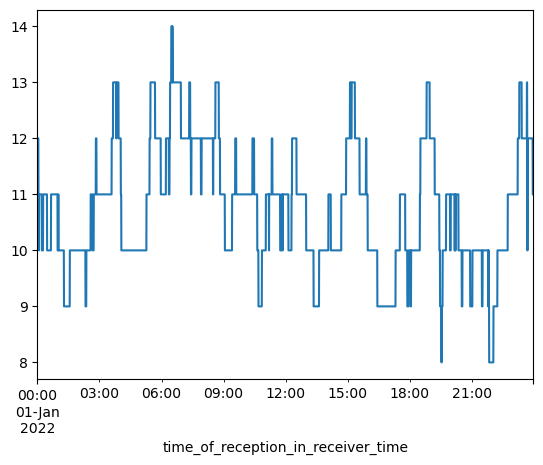

In [45]:

data_gps_c1c.groupby("time_of_reception_in_receiver_time").groups
# can be used to determine the number of observations in time
data_gps_c1c.groupby("time_of_reception_in_receiver_time").size()
data_gps_c1c.groupby("time_of_reception_in_receiver_time").size().plot()


In [46]:

data_gps_c1c.groupby(data_gps_c1c.doppler_observation_hz > 0).groups

{False: [1, 3, 4, 7, 8, 9, 10, 13, 15, 16, 19, 20, 21, 22, 25, 27, 28, 31, 32, 33, 34, 37, 39, 40, 43, 44, 45, 46, 49, 51, 52, 55, 56, 57, 58, 61, 63, 64, 67, 68, 69, 70, 73, 75, 76, 79, 80, 81, 84, 86, 87, 90, 91, 92, 95, 97, 98, 101, 102, 103, 106, 108, 109, 112, 113, 116, 118, 119, 122, 123, 124, 127, 129, 130, 133, 134, 135, 138, 140, 141, 144, 145, 146, 149, 151, 152, 155, 156, 157, 160, 162, 163, 166, 167, 168, 171, 173, 174, 177, 178, ...], True: [0, 2, 5, 6, 11, 12, 14, 17, 18, 23, 24, 26, 29, 30, 35, 36, 38, 41, 42, 47, 48, 50, 53, 54, 59, 60, 62, 65, 66, 71, 72, 74, 77, 78, 82, 83, 85, 88, 89, 93, 94, 96, 99, 100, 104, 105, 107, 110, 111, 114, 115, 117, 120, 121, 125, 126, 128, 131, 132, 136, 137, 139, 142, 143, 147, 148, 150, 153, 154, 158, 159, 161, 164, 165, 169, 170, 172, 175, 176, 180, 181, 183, 186, 187, 191, 192, 194, 197, 198, 202, 203, 205, 208, 209, 213, 214, 216, 219, 220, 224, ...]}